In [1]:
# Path setup
import sys
import os

%matplotlib inline

sys.path.append(os.path.dirname(os.path.join(os.getcwd(), "../src")))

In [2]:
from PIL import Image
import tensorflow as tf

In [3]:
from src import constants, utils, preprocess, training, postprocess, yolo_tiny

Using TensorFlow backend.


In [4]:
MODEL_DIM = constants.MODEL_DIM
GRID_SIZE = constants.GRID_SIZE
NUM_BOX = constants.NUM_BOX
NUM_CLASS = constants.NUM_CLASS

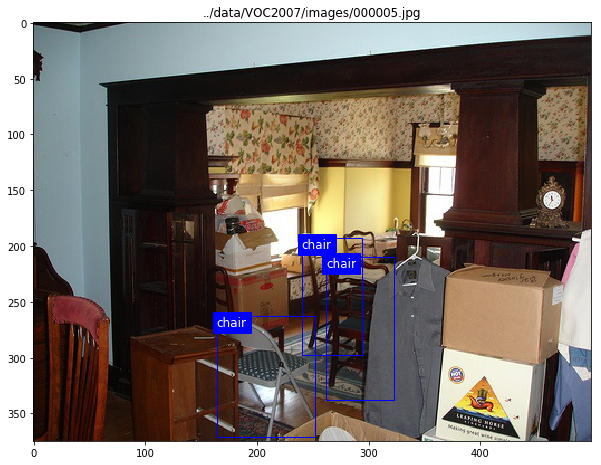

In [5]:
utils.visualize_label("../data/VOC2007/images/000005.jpg", "../data/VOC2007/labels/000005.txt")

In [6]:
ori_image = utils.load_image("../data/VOC2007/images/000005.jpg")
ori_labels = utils.load_labels("../data/VOC2007/labels/000005.txt")

In [7]:
processed_image = preprocess.preprocess_image(ori_image, MODEL_DIM)
bboxs = preprocess.generate_bboxs(ori_labels, ori_image, MODEL_DIM, GRID_SIZE, NUM_BOX, NUM_CLASS)

In [8]:
bboxs.shape

(7, 7, 50)

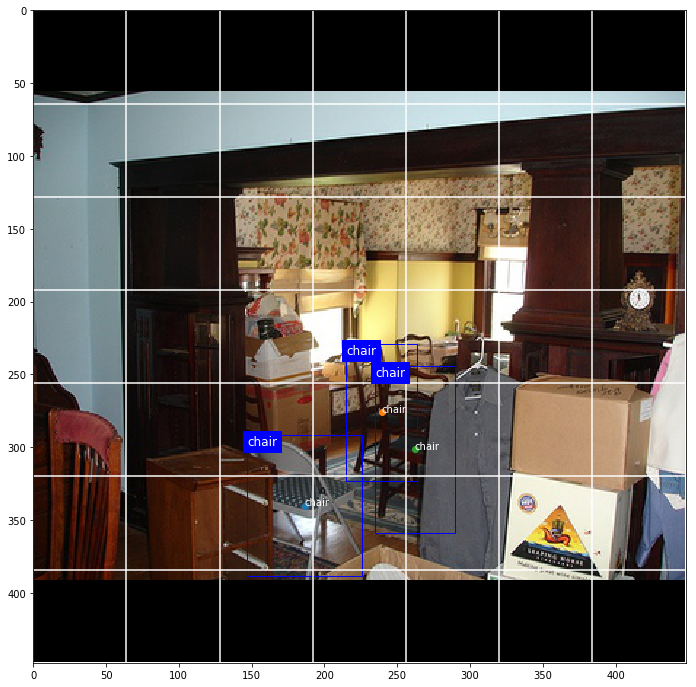

In [9]:
utils.draw_bboxs(processed_image, bboxs)

In [10]:
# preprocess.preprocess_data("../data/VOC2007/images",
#                            "../data/VOC2007/labels",
#                            "../data/VOC2007/pre_images",
#                            "../data/VOC2007/pre_labels")

In [11]:
yolo_tiny_model = yolo_tiny.yolo_tiny_model()
yolo_tiny_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 448, 448, 3)  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 448, 448, 16) 448         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 448, 448, 16) 64          Conv1[0][0]                      
__________________________________________________________________________________________________
leaky_re_lu_1 (LeakyReLU)       (None, 448, 448, 16) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
max_poolin

In [12]:
# training.train_yolo(
#     model,
#     train_X="../data/VOC2007/pre_images",
#     train_Y="../data/VOC2007/pre_labels",
#     batch_size=32,
#     epochs=20,
#     epoch_begin=0,
# )
yolo_tiny_model.load_weights("../model/yolo_tiny_weights.h5")

In [13]:
# training.evaluate_yolo(yolo_tiny_model, "../data/VOC2007/pre_images", "../data/VOC2007/pre_labels")

In [14]:
train_generator = training.batch_generator("../data/VOC2007/pre_images", "../data/VOC2007/pre_labels", batch_size=10)
X_train, Y_train = next(train_generator)
Y_pred = yolo_tiny_model.predict(X_train)

class:  3, conf: 1.00, [ 0.33511728  0.4066475   0.91341776  0.62635452]
class: 14, conf: 1.00, [ 0.78130025  0.64819646  0.83592576  0.72102463]
class:  3, conf: 0.97, [ 0.00944537  0.24506907  0.57749224  0.59639317]
class: 14, conf: 0.76, [ 0.9503926   0.65752304  0.99349415  0.72783637]


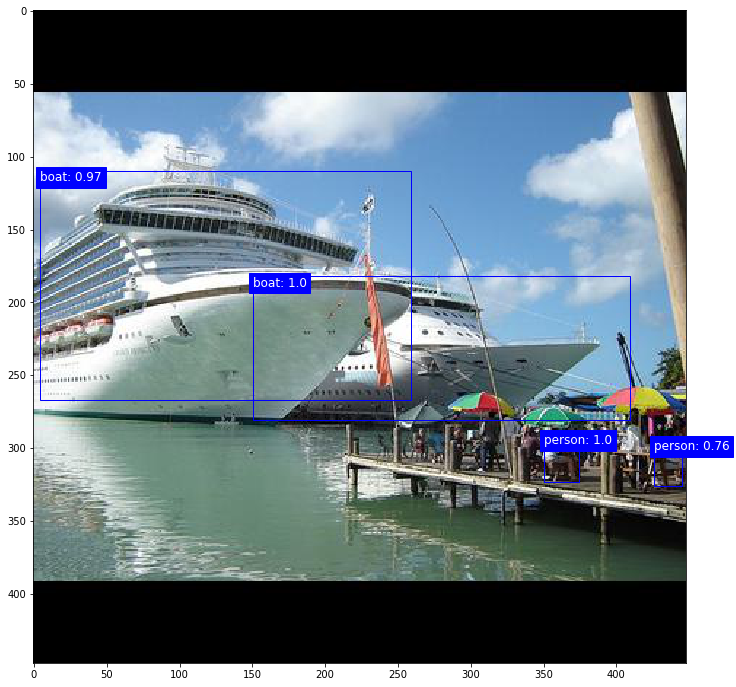

In [15]:
test_index = 5
with tf.Session() as sess:
    scores, boxes, classes = postprocess.postprocessing(sess, Y_pred[test_index])
    
    for score, box, class_idx in zip(scores, boxes, classes):
        print("class: {:2d}, conf: {:.2f}, {}".format(class_idx, score, box))
    
    utils.draw_score_bbox(X_train[test_index], scores, boxes, classes)

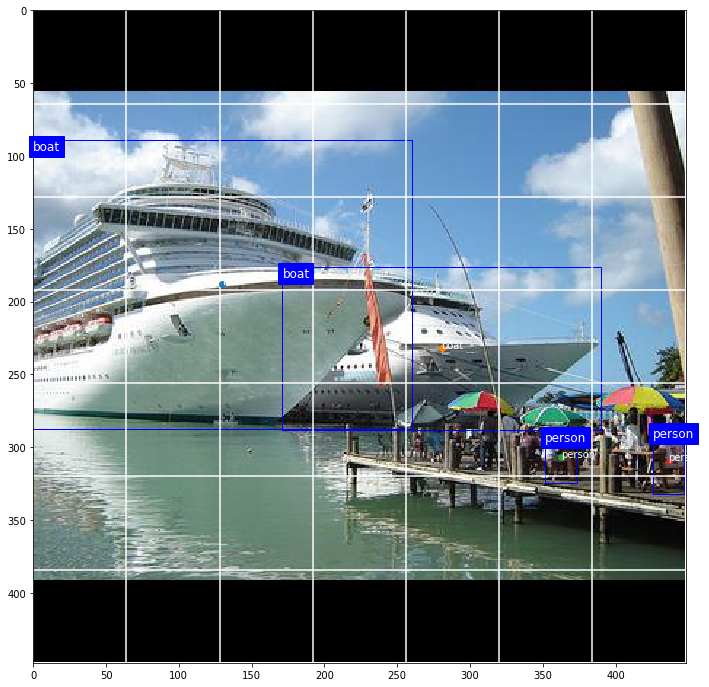

In [16]:
utils.draw_bboxs(Image.fromarray(X_train[test_index]), Y_train[test_index].reshape((GRID_SIZE, GRID_SIZE, -1)))